In [52]:
!pip install google_trans_new

In [3]:
import pandas as pd
import googletrans
import matplotlib.pyplot as plt
plt.rcdefaults()

In [5]:
data=pd.read_csv(r'/content/amazon.csv',thousands='.',engine='python')

In [6]:
data.shape

(6454, 5)

In [20]:
data.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,NaN,1998-01-01
1,1999,Acre,Janeiro,NaN,1999-01-01
2,2000,Acre,Janeiro,NaN,2000-01-01
3,2001,Acre,Janeiro,NaN,2001-01-01
4,2002,Acre,Janeiro,NaN,2002-01-01


In [21]:
data.describe(include='all')

,year,state,month,number,date
count,6454.000000,6454,6454,5837.000000,6454
unique,NaN,23,12,NaN,20
top,NaN,Rio,Janeiro,NaN,2009-01-01
freq,NaN,717,541,NaN,324
mean,2007.461729,NaN,NaN,577.947918,NaN
std,5.746654,NaN,NaN,1625.176973,NaN
min,1998.000000,NaN,NaN,1.000000,NaN
25%,2002.000000,NaN,NaN,16.000000,NaN
50%,2007.000000,NaN,NaN,72.000000,NaN
75%,2012.000000,NaN,NaN,334.000000,NaN


In [22]:
data.isna().sum()

year        0
state       0
month       0
number    617
date        0
dtype: int64

In [23]:
import numpy as np

In [24]:
data=data.replace(0,np.nan)
data2=data.dropna(subset=['number'])

In [25]:
data2.describe(include='all')

,year,state,month,number,date
count,5837.000000,5837,5837,5837.000000,5837
unique,NaN,23,12,NaN,20
top,NaN,Rio,Outubro,NaN,2016-01-01
freq,NaN,661,534,NaN,317
mean,2007.834847,NaN,NaN,577.947918,NaN
std,5.649076,NaN,NaN,1625.176973,NaN
min,1998.000000,NaN,NaN,1.000000,NaN
25%,2003.000000,NaN,NaN,16.000000,NaN
50%,2008.000000,NaN,NaN,72.000000,NaN
75%,2013.000000,NaN,NaN,334.000000,NaN


In [26]:
forest_fire_per_month = data2.groupby('month')['number'].sum()

In [27]:
print(forest_fire_per_month)

month
Abril          28364.0
Agosto        740841.0
Dezembro      152596.0
Fevereiro      30952.0
Janeiro        52587.0
Julho         217620.0
Junho         111405.0
Maio           46083.0
Mar�o          35118.0
Novembro      312326.0
Outubro       629665.0
Setembro     1015925.0
Name: number, dtype: float64


In [32]:
months_unique = list(data.month.unique())
months_unique

['Janeiro',
 'Fevereiro',
 'Mar�o',
 'Abril',
 'Maio',
 'Junho',
 'Julho',
 'Agosto',
 'Setembro',
 'Outubro',
 'Novembro',
 'Dezembro']

In [28]:
months_unique = list(data.month.unique())
forest_fire_per_month = forest_fire_per_month.reindex(months_unique, axis=0)
forest_fire_per_month = forest_fire_per_month.to_frame()
forest_fire_per_month.head()

,number
month,
Janeiro,52587.0
Fevereiro,30952.0
Mar�o,35118.0
Abril,28364.0
Maio,46083.0


In [29]:
forest_fire_per_month.reset_index(level=0, inplace=True)
forest_fire_per_month.head()

,month,number
0,Janeiro,52587.0
1,Fevereiro,30952.0
2,Mar�o,35118.0
3,Abril,28364.0
4,Maio,46083.0


In [56]:
from google_trans_new import google_translator  
translator = google_translator()

In [57]:
for month in months_unique: 
    detected = translator.detect(month)     
    translated = translator.translate(month)     
    print(detected)     
    print(translated)     
    print("...")

['pt', 'portuguese']
January 
...
['pt', 'portuguese']
February 
...
['zh-CN', 'chinese (simplified)']
Mar�o 
...
['es', 'spanish']
April 
...
['pt', 'portuguese']
May 
...
['pt', 'portuguese']
June 
...
['pt', 'portuguese']
July 
...
['es', 'spanish']
August 
...
['pt', 'portuguese']
September 
...
['pt', 'portuguese']
October 
...
['pt', 'portuguese']
November 
...
['pt', 'portuguese']
December 
...


In [61]:
forest_fire_per_month['Month'] = forest_fire_per_month['month'].apply(translator.translate)
forest_fire_per_month

,month,number,Month
0,Janeiro,52587.0,January
1,Fevereiro,30952.0,February
2,Mar�o,35118.0,Mar�o
3,Abril,28364.0,April
4,Maio,46083.0,May
5,Junho,111405.0,June
6,Julho,217620.0,July
7,Agosto,740841.0,August
8,Setembro,1015925.0,September
9,Outubro,629665.0,October


In [62]:
forest_fire_per_month=forest_fire_per_month.drop('month',axis=1)
forest_fire_per_month

,number,Month
0,52587.0,January
1,30952.0,February
2,35118.0,Mar�o
3,28364.0,April
4,46083.0,May
5,111405.0,June
6,217620.0,July
7,740841.0,August
8,1015925.0,September
9,629665.0,October


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

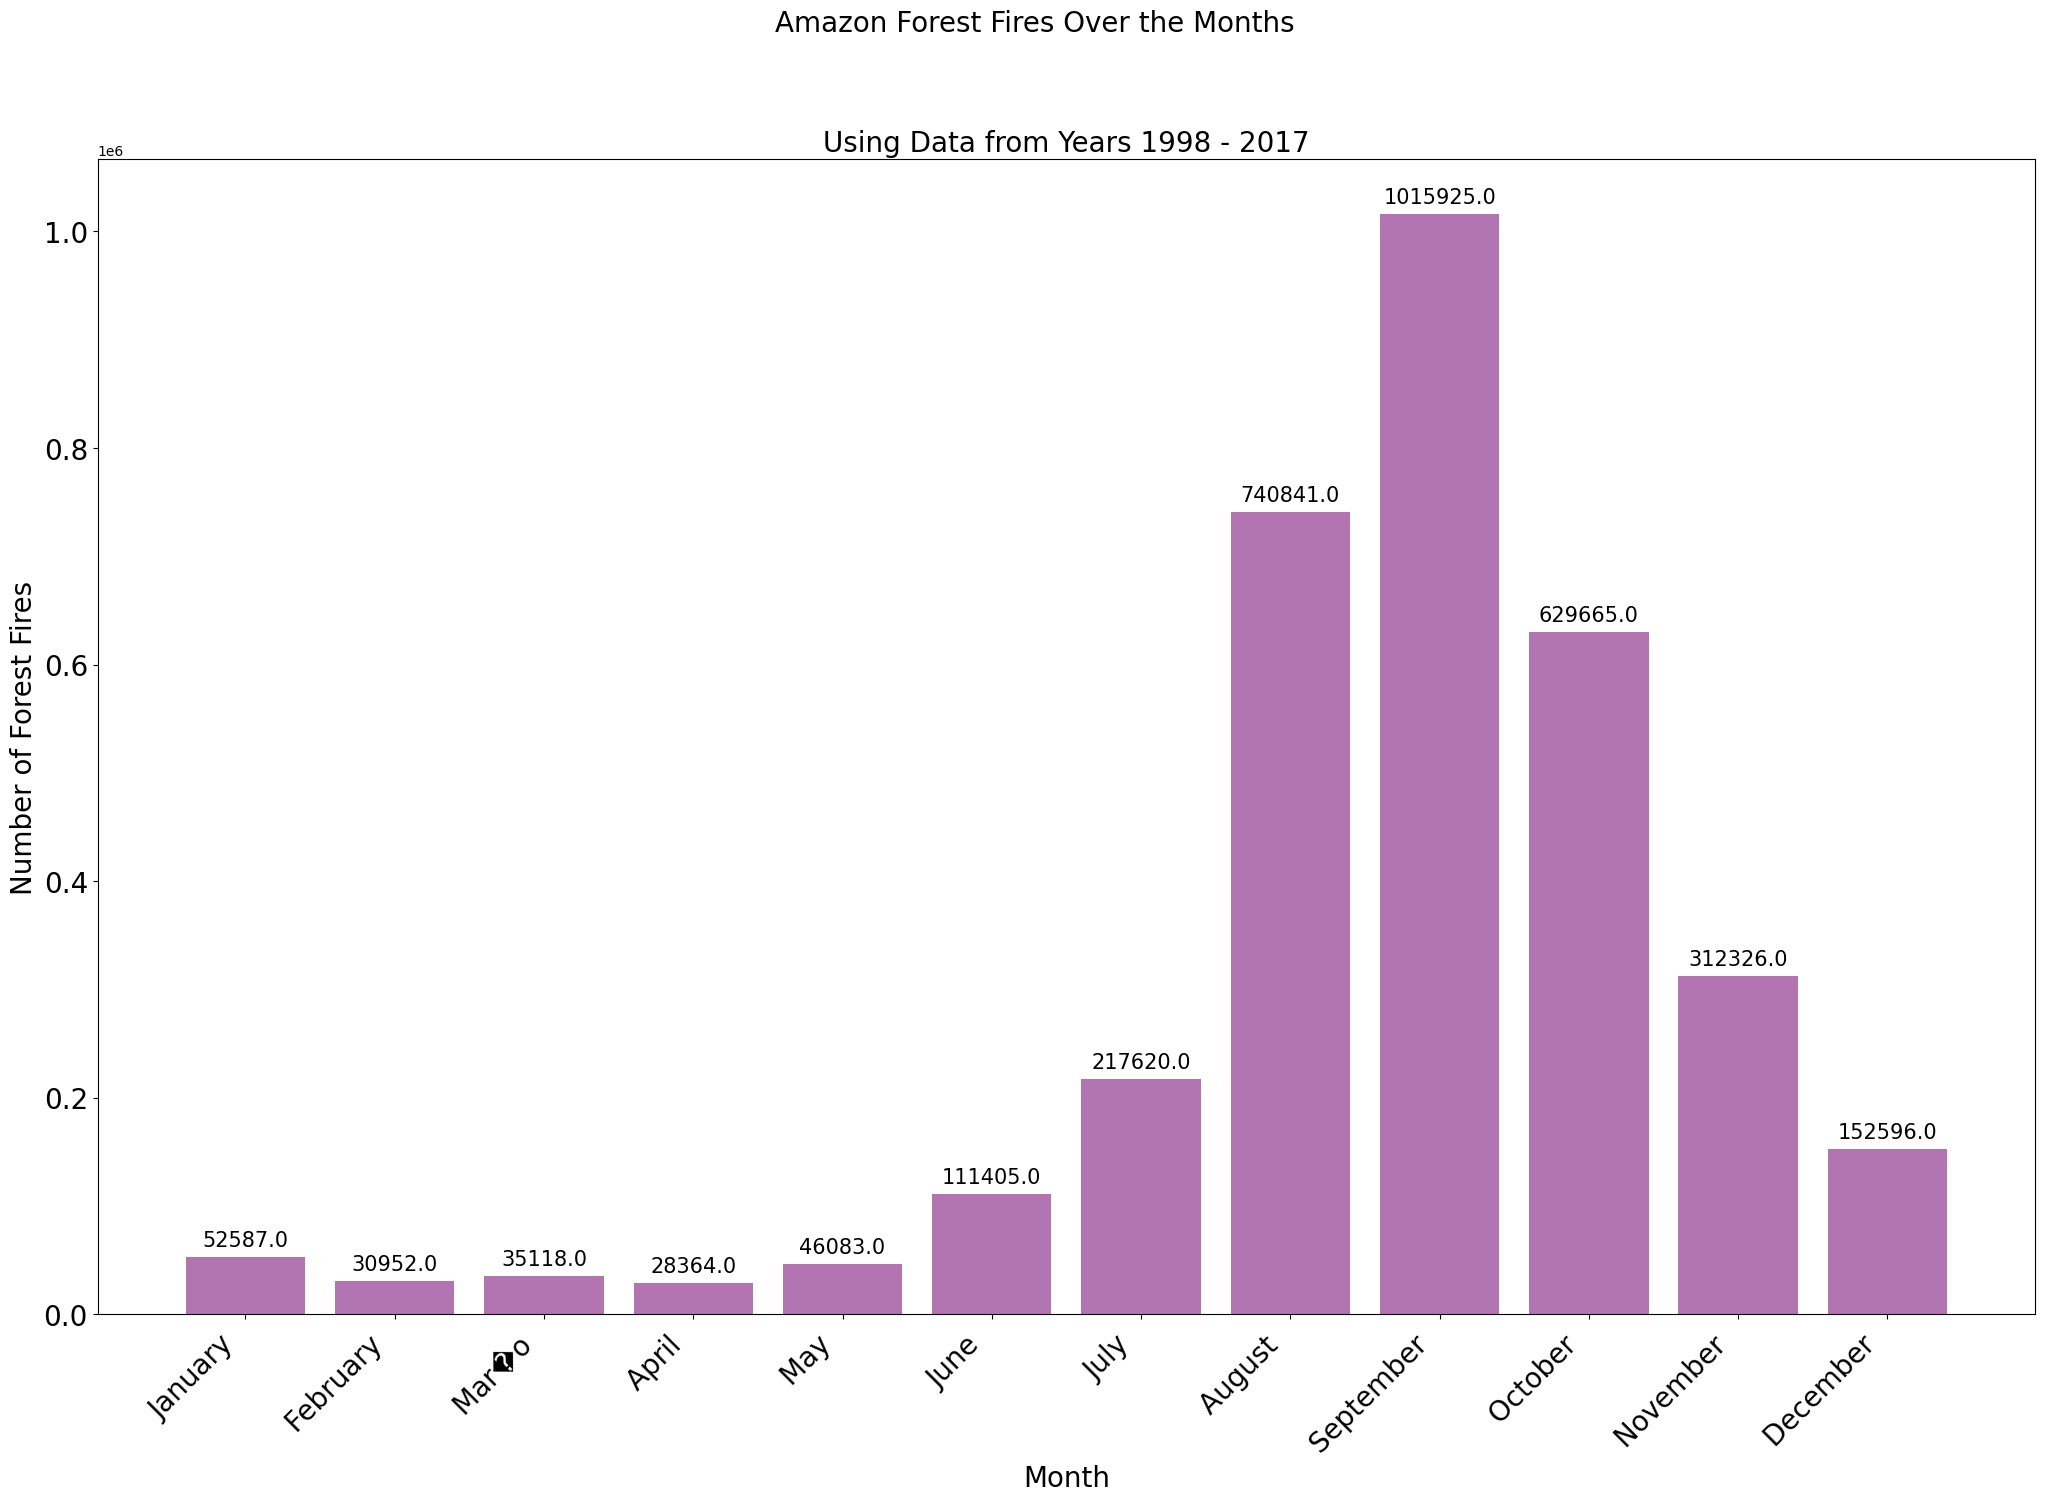

In [66]:
plt.figure(figsize=(25, 15)) #specify width and height 
plt.bar(
forest_fire_per_month['Month'],
forest_fire_per_month['number'], 
color = (0.5,0.1,0.5,0.6)) 
plt.suptitle('Amazon Forest Fires Over the Months', fontsize=20)
plt.title('Using Data from Years 1998 - 2017', fontsize=20)  
plt.xlabel('Month', fontsize=20) 
plt.ylabel('Number of Forest Fires', fontsize=20)
for i, num in enumerate(forest_fire_per_month['number']):
    plt.text(
        i,
        num + 10000,
        num,
        ha='center',
        fontsize=15)   
plt.setp(plt.gca().get_xticklabels(),
         rotation=45,
         horizontalalignment='right',
         fontsize=20)
plt.setp(plt.gca().get_yticklabels(), fontsize=20)